In [234]:
# !pip install pycoingecko

In [1]:
import yfinance as yf
from pycoingecko import CoinGeckoAPI
import pandas_datareader as web
import datetime as dt
import plotly.graph_objects as go


# Step 1: Import libraries and load data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Loading Data from Yahoo Finance 

In [2]:
coins = ['ETH-GBP', 'BTC-GBP', 'DOGE-GBP', 'GRC-GBP', 'LTC-GBP', 'ADA-GBP', 'USDT-GBP', 'BNB-GBP', 'USDC-GBP', 'XRP-GBP', 'MATIC-GBP', 'SOL-GBP', 'FIL-GBP', 'DOT-GBP', 'FTM-GBP', 'TRX-GBP', 'AVAX-GBP', 'DAI-GBP', 'LINK-GBP', 'ATOM-GBP']
# startDate = datetime.datetime(2019, 5, 31)
# endDate = datetime.datetime(2021, 1, 30)
df_list = list()
for ticker in coins:
    # startDate = data.datetime(2019, 5, 31)
    # endDate = (2021, 1, 30)
    data = yf.download(ticker, group_by="Ticker", start='2018-01-30',end='2023-01-30', interval = '1d', progress=False,auto_adjust=True)
    data['coin_name'] = ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
dataset= pd.concat(df_list)
dataset.head(10)



,Open,High,Low,Close,Volume,coin_name
Date,,,,,,
2018-01-30,841.599121,842.673218,748.600281,756.768433,2902260822,ETH-GBP
2018-01-31,756.740112,797.020020,730.940430,787.708740,2646728227,ETH-GBP
2018-02-01,788.455322,814.182556,690.422729,726.806885,3688524450,ETH-GBP
2018-02-02,726.091858,726.244568,531.691895,648.572937,4754454844,ETH-GBP
2018-02-03,650.999268,702.509216,600.347046,682.732971,2297082198,ETH-GBP
2018-02-04,683.191895,686.283264,570.724548,591.553528,2124089332,ETH-GBP
2018-02-05,591.749146,606.904724,460.493652,500.574463,3062131616,ETH-GBP
2018-02-06,507.593048,570.719482,411.504425,568.301819,4670586093,ETH-GBP
2018-02-07,566.371460,611.933899,518.032898,545.477356,2807248338,ETH-GBP


In [3]:
data = dataset.copy()

In [4]:
data.coin_name.unique()

array(['ETH-GBP', 'BTC-GBP', 'DOGE-GBP', 'GRC-GBP', 'LTC-GBP', 'ADA-GBP',
       'USDT-GBP', 'BNB-GBP', 'USDC-GBP', 'XRP-GBP', 'MATIC-GBP',
       'SOL-GBP', 'FIL-GBP', 'DOT-GBP', 'FTM-GBP', 'TRX-GBP', 'AVAX-GBP',
       'DAI-GBP', 'LINK-GBP', 'ATOM-GBP'], dtype=object)

In [5]:
print(data.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
coin_name     object
dtype: object


In [6]:
from matplotlib.pylab import False_
data.reset_index(inplace = True, drop =False)
# data['Date'] = pd.to_datetime(data['Date'], utc=True)
data.head()


,Date,Open,High,Low,Close,Volume,coin_name
0,2018-01-30,841.599121,842.673218,748.600281,756.768433,2902260822,ETH-GBP
1,2018-01-31,756.740112,797.020020,730.940430,787.708740,2646728227,ETH-GBP
2,2018-02-01,788.455322,814.182556,690.422729,726.806885,3688524450,ETH-GBP
3,2018-02-02,726.091858,726.244568,531.691895,648.572937,4754454844,ETH-GBP
4,2018-02-03,650.999268,702.509216,600.347046,682.732971,2297082198,ETH-GBP


# Data Visualization

In [7]:
data.coin_name.unique()

array(['ETH-GBP', 'BTC-GBP', 'DOGE-GBP', 'GRC-GBP', 'LTC-GBP', 'ADA-GBP',
       'USDT-GBP', 'BNB-GBP', 'USDC-GBP', 'XRP-GBP', 'MATIC-GBP',
       'SOL-GBP', 'FIL-GBP', 'DOT-GBP', 'FTM-GBP', 'TRX-GBP', 'AVAX-GBP',
       'DAI-GBP', 'LINK-GBP', 'ATOM-GBP'], dtype=object)

In [8]:
data_LTC = data.query("coin_name == 'LTC-GBP'")
data_LTC

,Date,Open,High,Low,Close,Volume,coin_name
7304,2018-01-30,128.958786,129.120789,115.250954,116.769821,306080972,LTC-GBP
7305,2018-01-31,116.783951,117.910927,111.386284,115.060226,255894197,LTC-GBP
7306,2018-02-01,115.293381,116.729317,92.204391,99.752541,378464774,LTC-GBP
7307,2018-02-02,99.938309,99.973351,74.077774,93.044617,577577881,LTC-GBP
7308,2018-02-03,93.060196,117.248581,85.811615,113.491501,487022686,LTC-GBP
...,...,...,...,...,...,...,...
9125,2023-01-25,70.727631,73.879471,69.784149,72.020622,424505416,LTC-GBP
9126,2023-01-26,72.009766,72.447166,70.221191,70.552429,398968890,LTC-GBP
9127,2023-01-27,70.554230,71.965866,69.617188,71.759781,349660796,LTC-GBP
9128,2023-01-28,71.763527,72.419571,70.571831,72.370499,326017728,LTC-GBP


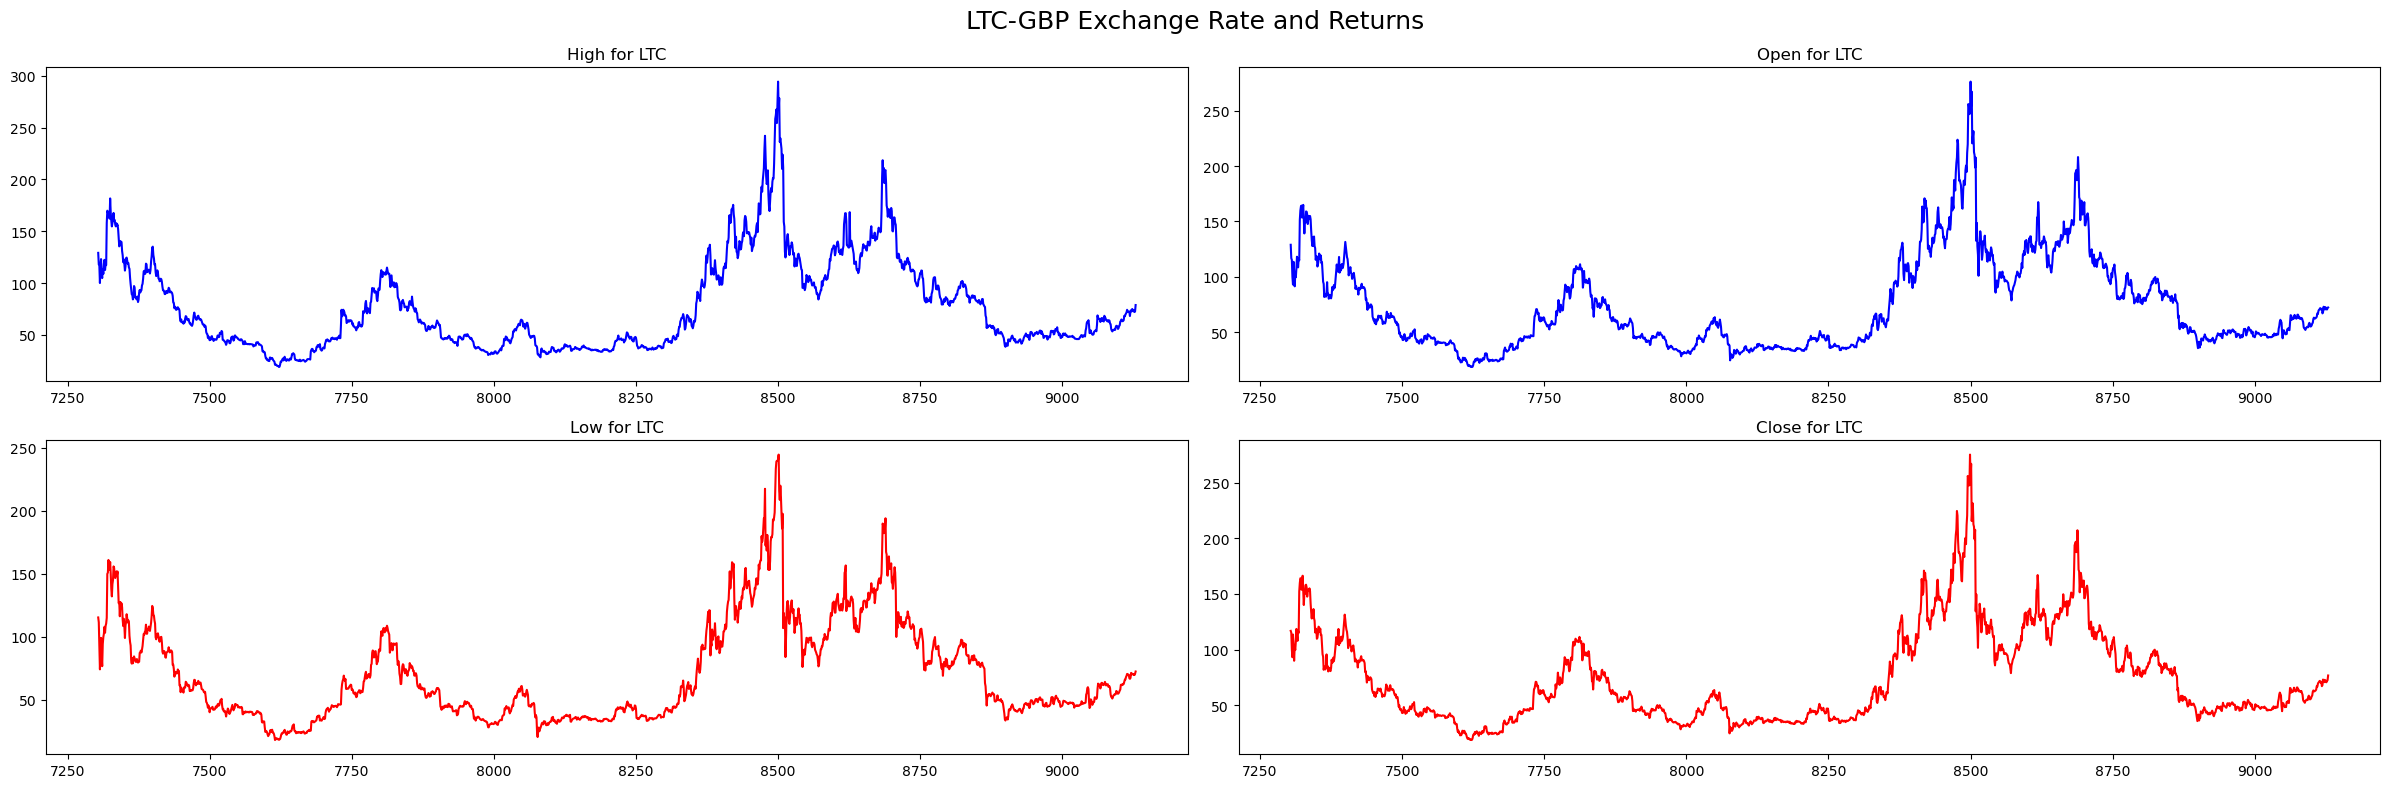

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(24, 8))


plt.suptitle("LTC-GBP Exchange Rate and Returns", fontsize=18)
axs[0, 0].plot(data_LTC["High"], color='blue')
axs[0, 0].set_title("High for LTC")


# plt.subplot(1,2,2)
axs[1, 0].plot(data_LTC["Low"], color='red')
axs[1, 0].set_title("Low for LTC")


axs[0, 1].plot(data_LTC["Open"], color='blue')
axs[0, 1].set_title("Open for LTC")

# plt.subplot(1,3,3)
axs[1, 1].plot(data_LTC["Close"], color='red')
axs[1, 1].set_title("Close for LTC")

fig.tight_layout()

# Making a seasonal plot

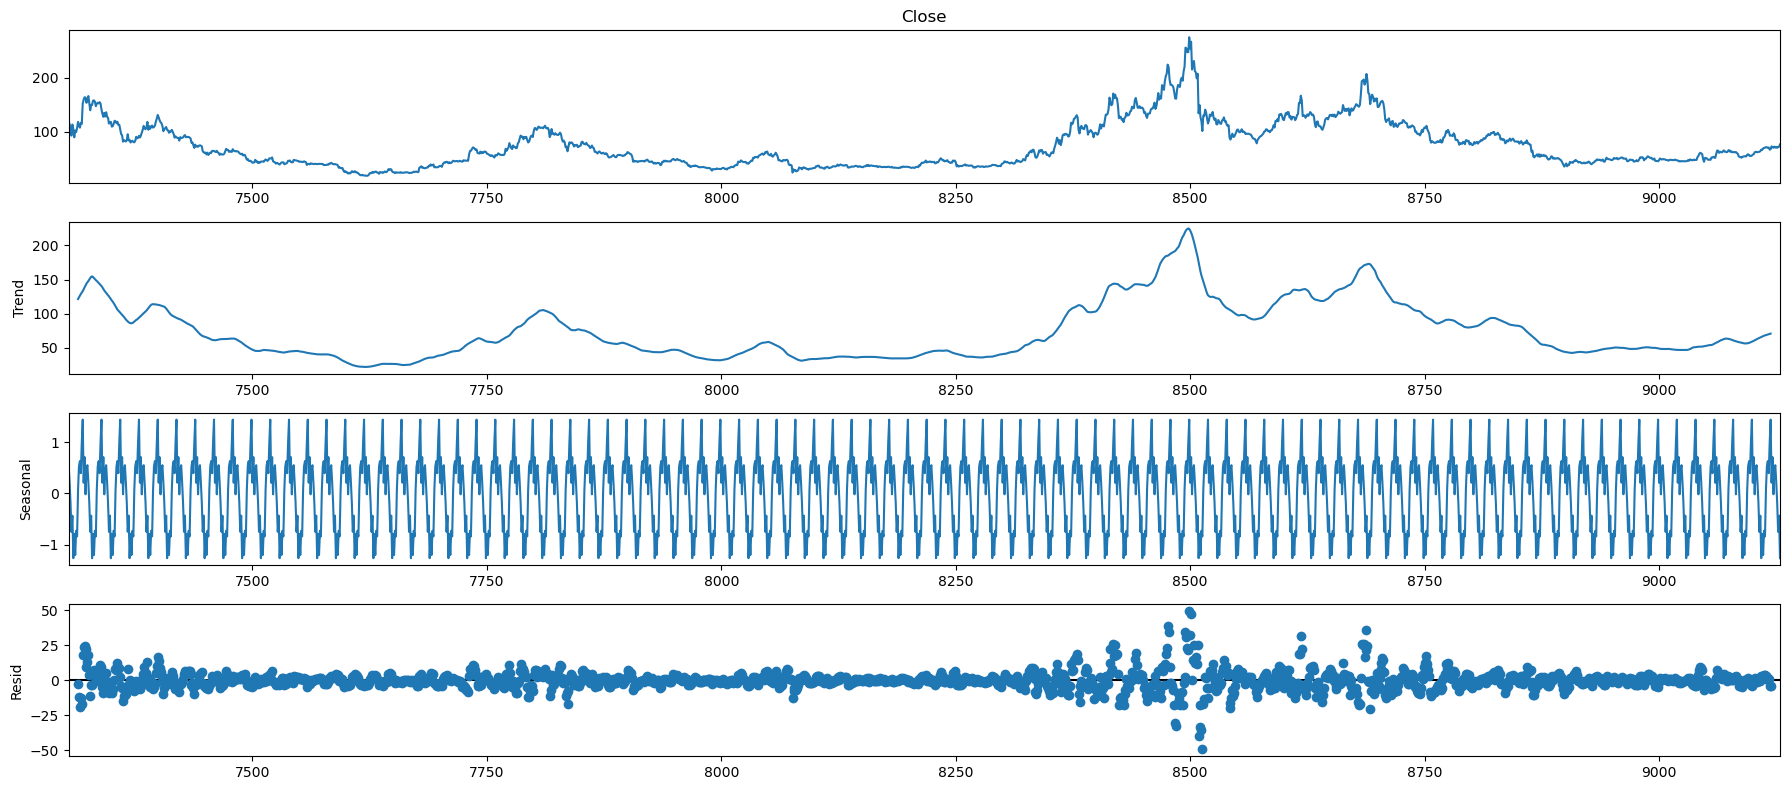

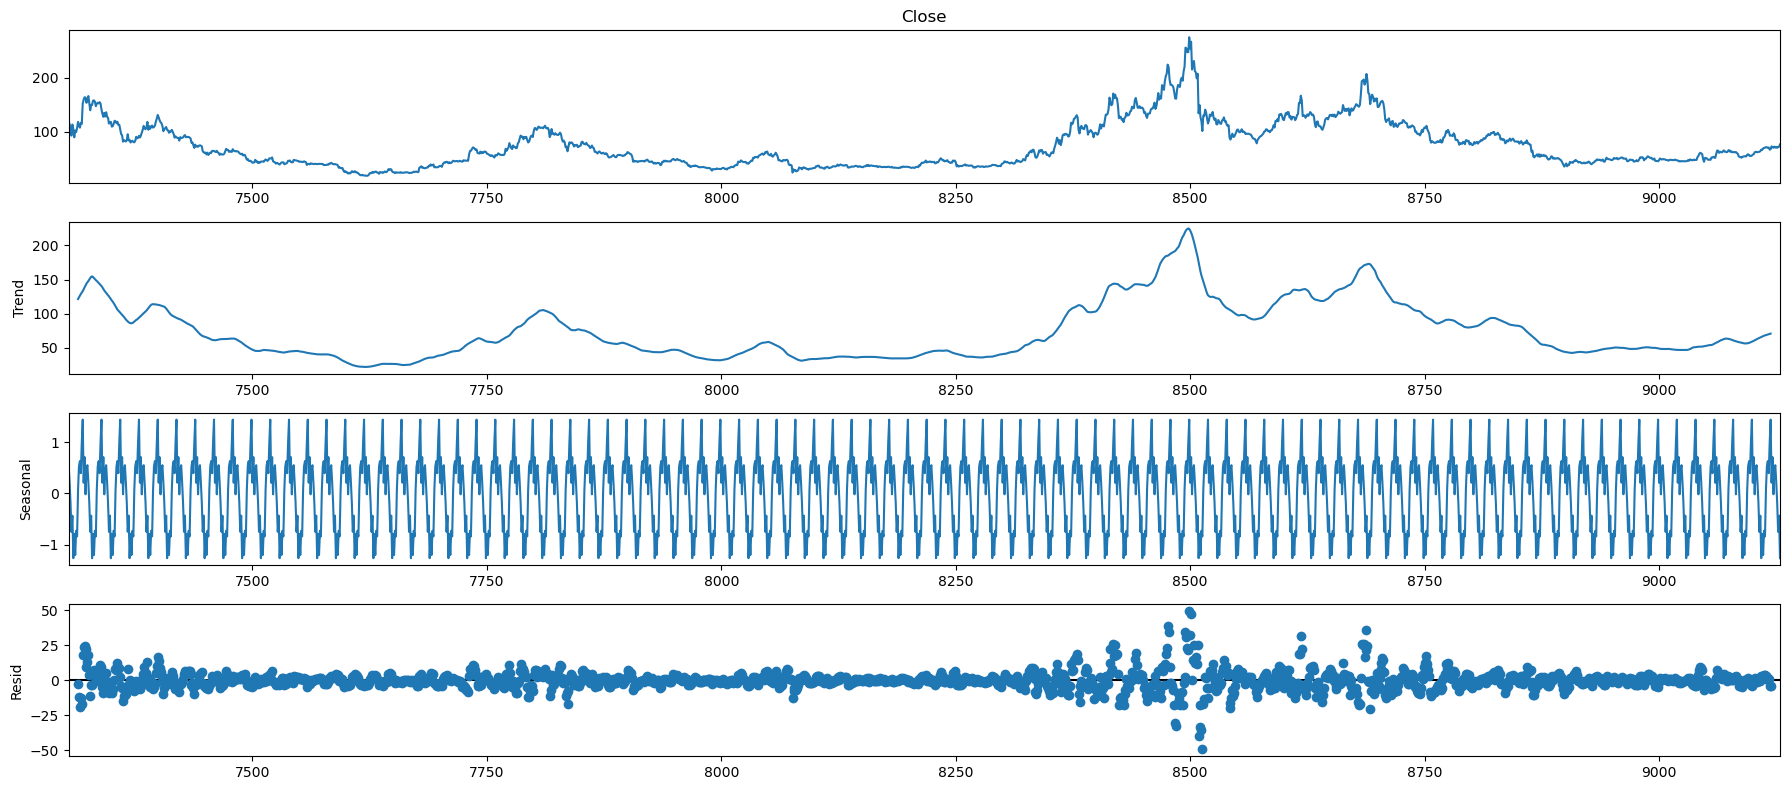

In [10]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa.seasonal import seasonal_decompose

sd_result = seasonal_decompose(data_LTC["Close"], model='additive', period=20)

sd_result.plot()

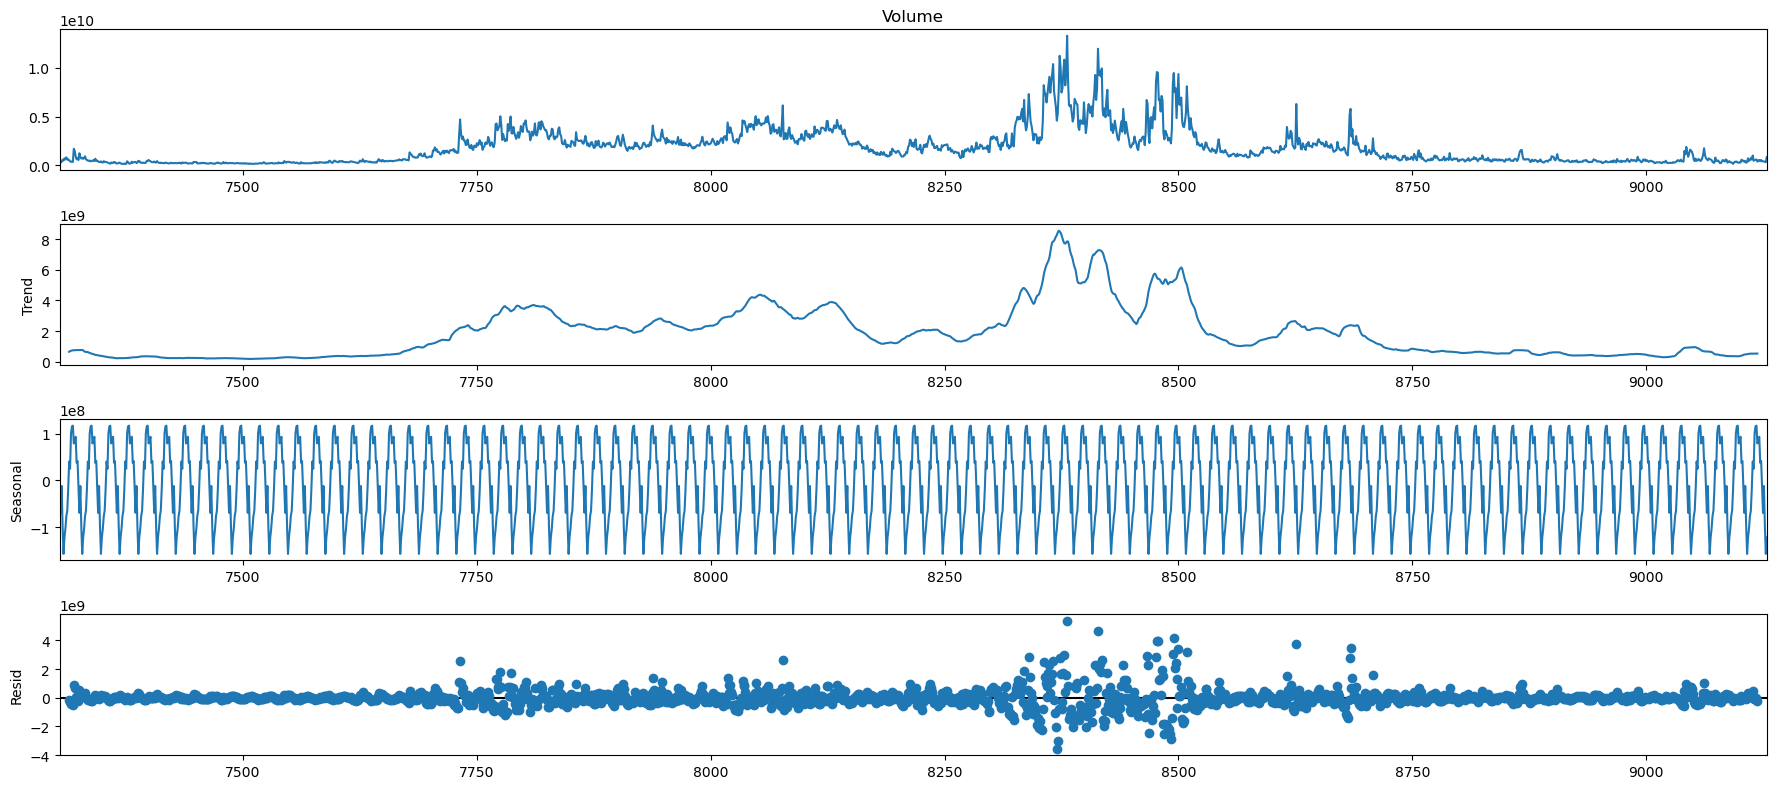

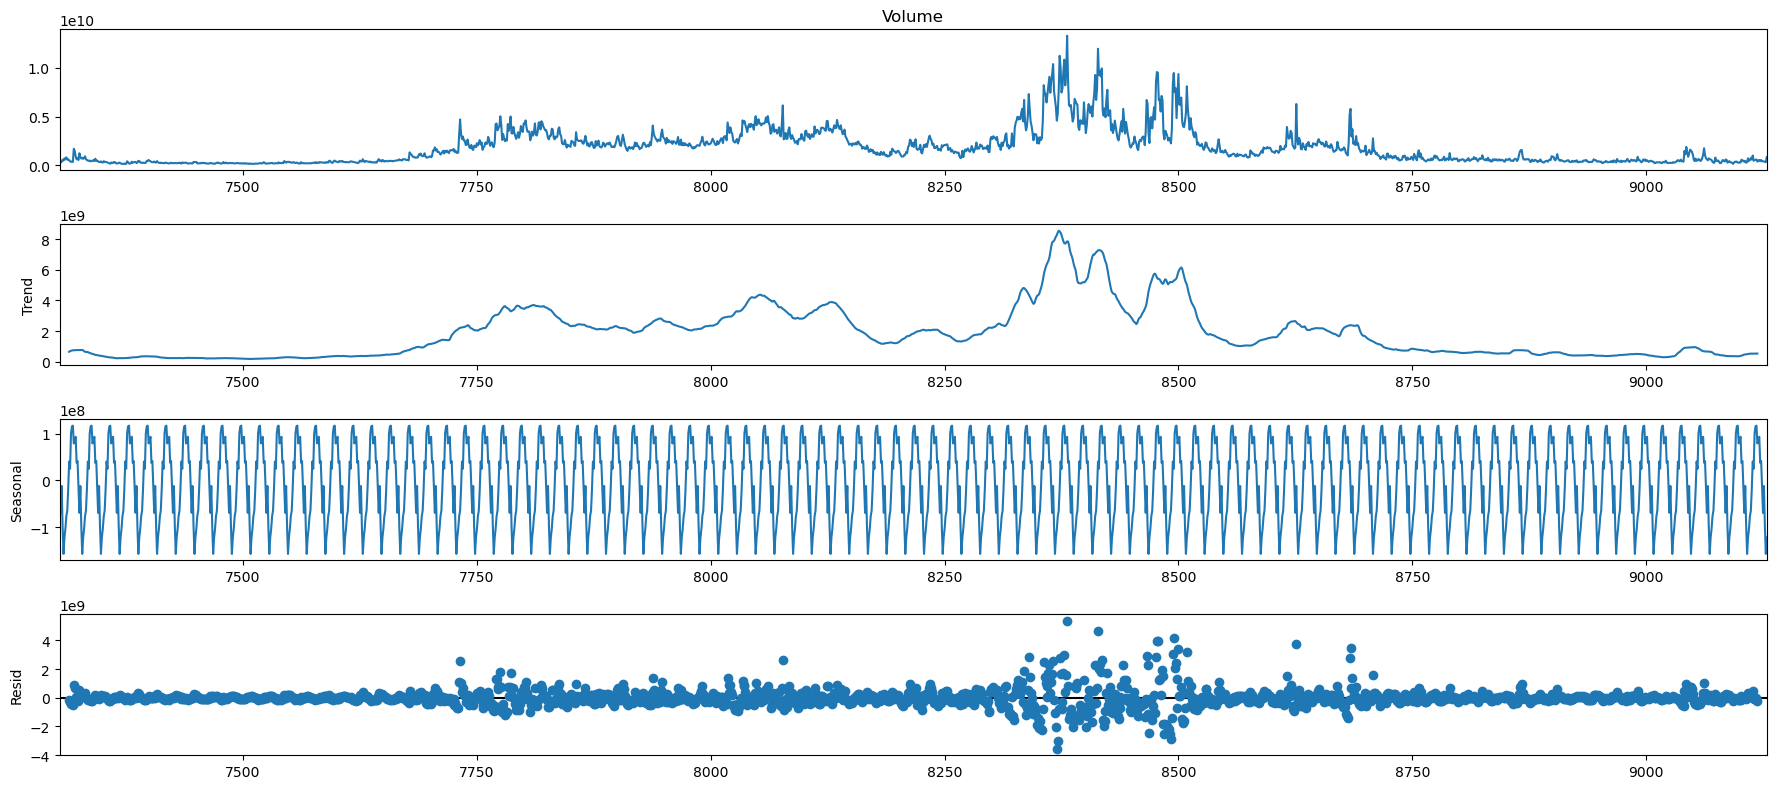

In [11]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa.seasonal import seasonal_decompose

sd_result = seasonal_decompose(data_LTC["Volume"], model='additive', period=20)

sd_result.plot()

In [12]:
data_ETH = data.query("coin_name == 'ETH-GBP'")
data_ETH

,Date,Open,High,Low,Close,Volume,coin_name
0,2018-01-30,841.599121,842.673218,748.600281,756.768433,2902260822,ETH-GBP
1,2018-01-31,756.740112,797.020020,730.940430,787.708740,2646728227,ETH-GBP
2,2018-02-01,788.455322,814.182556,690.422729,726.806885,3688524450,ETH-GBP
3,2018-02-02,726.091858,726.244568,531.691895,648.572937,4754454844,ETH-GBP
4,2018-02-03,650.999268,702.509216,600.347046,682.732971,2297082198,ETH-GBP
...,...,...,...,...,...,...,...
1821,2023-01-25,1262.450928,1316.140137,1242.297607,1298.670044,8540345434,ETH-GBP
1822,2023-01-26,1298.162354,1311.223145,1282.853516,1291.285767,6762342473,ETH-GBP
1823,2023-01-27,1291.265015,1304.416870,1261.960083,1290.813477,6562041313,ETH-GBP
1824,2023-01-28,1290.788330,1296.101807,1264.348389,1270.038452,4687546977,ETH-GBP


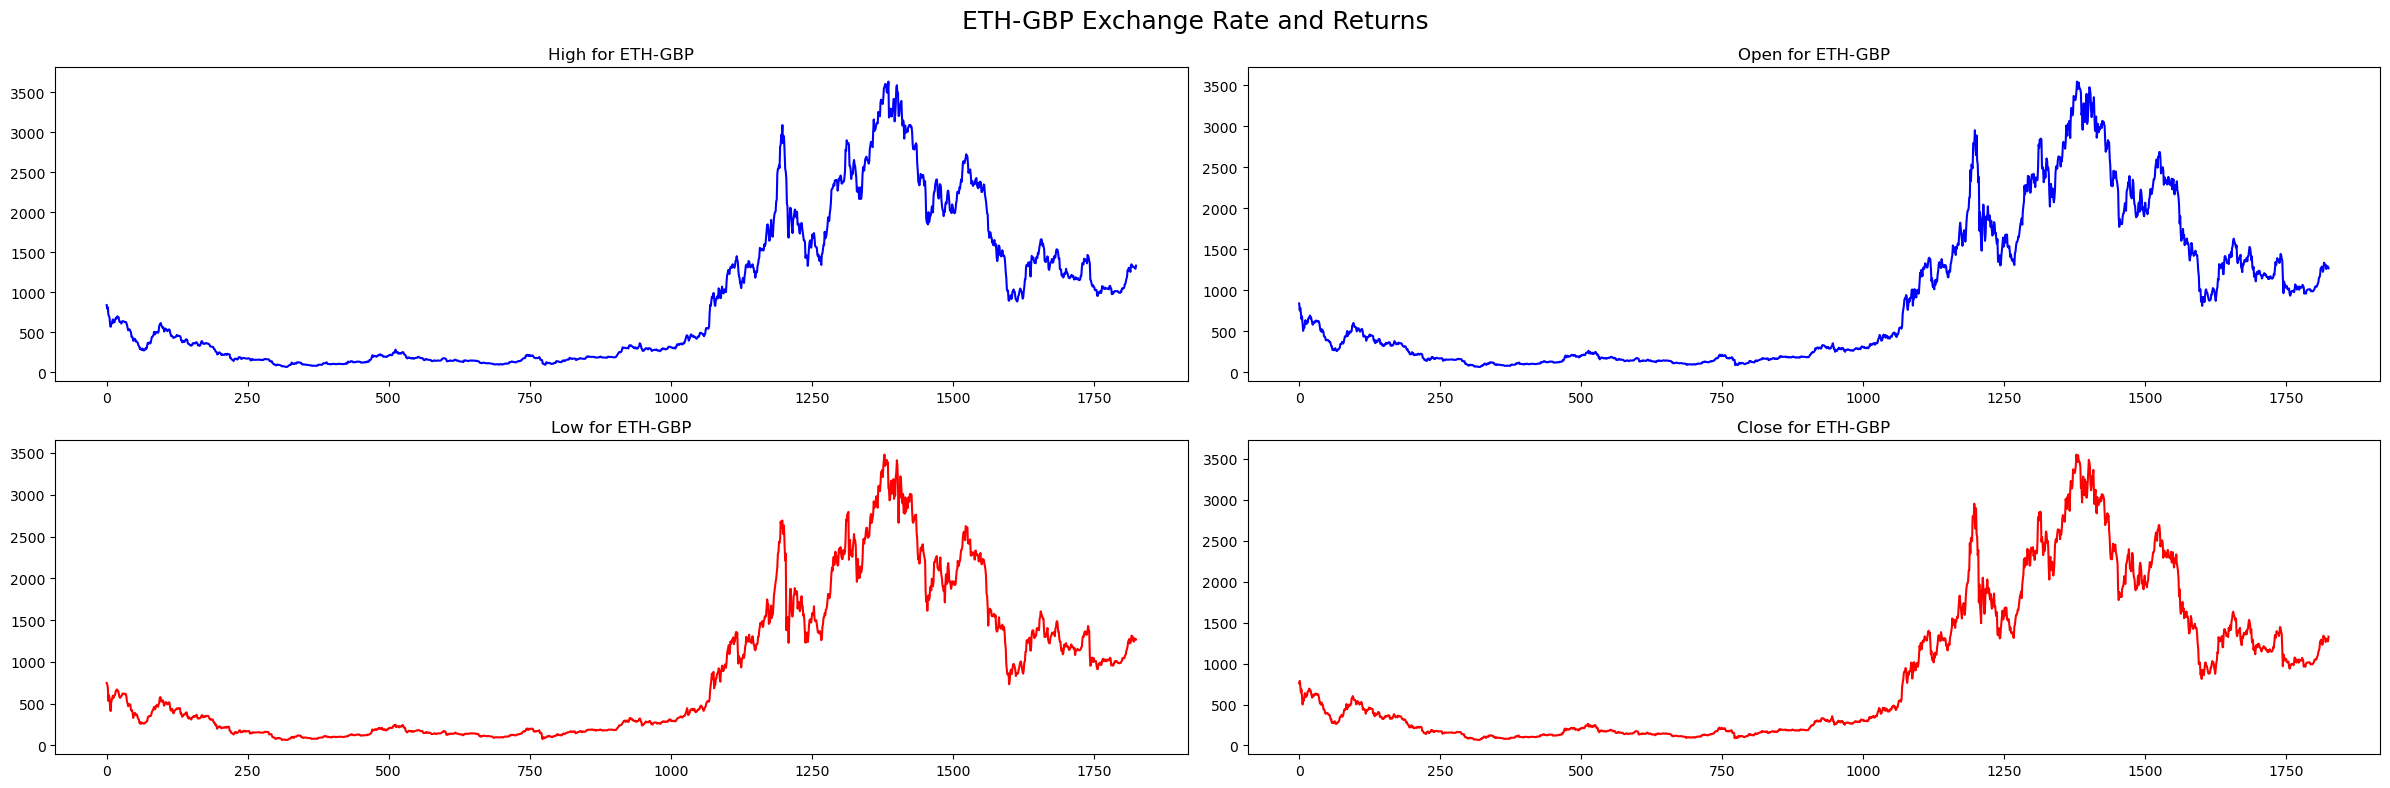

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(24, 8))


plt.suptitle("ETH-GBP Exchange Rate and Returns", fontsize=18)
axs[0, 0].plot(data_ETH["High"], color='blue')
axs[0, 0].set_title("High for ETH-GBP")


# plt.subplot(1,2,2)
axs[1, 0].plot(data_ETH["Low"], color='red')
axs[1, 0].set_title("Low for ETH-GBP")


axs[0, 1].plot(data_ETH["Open"], color='blue')
axs[0, 1].set_title("Open for ETH-GBP")

# plt.subplot(1,3,3)
axs[1, 1].plot(data_ETH["Close"], color='red')
axs[1, 1].set_title("Close for ETH-GBP")

fig.tight_layout()

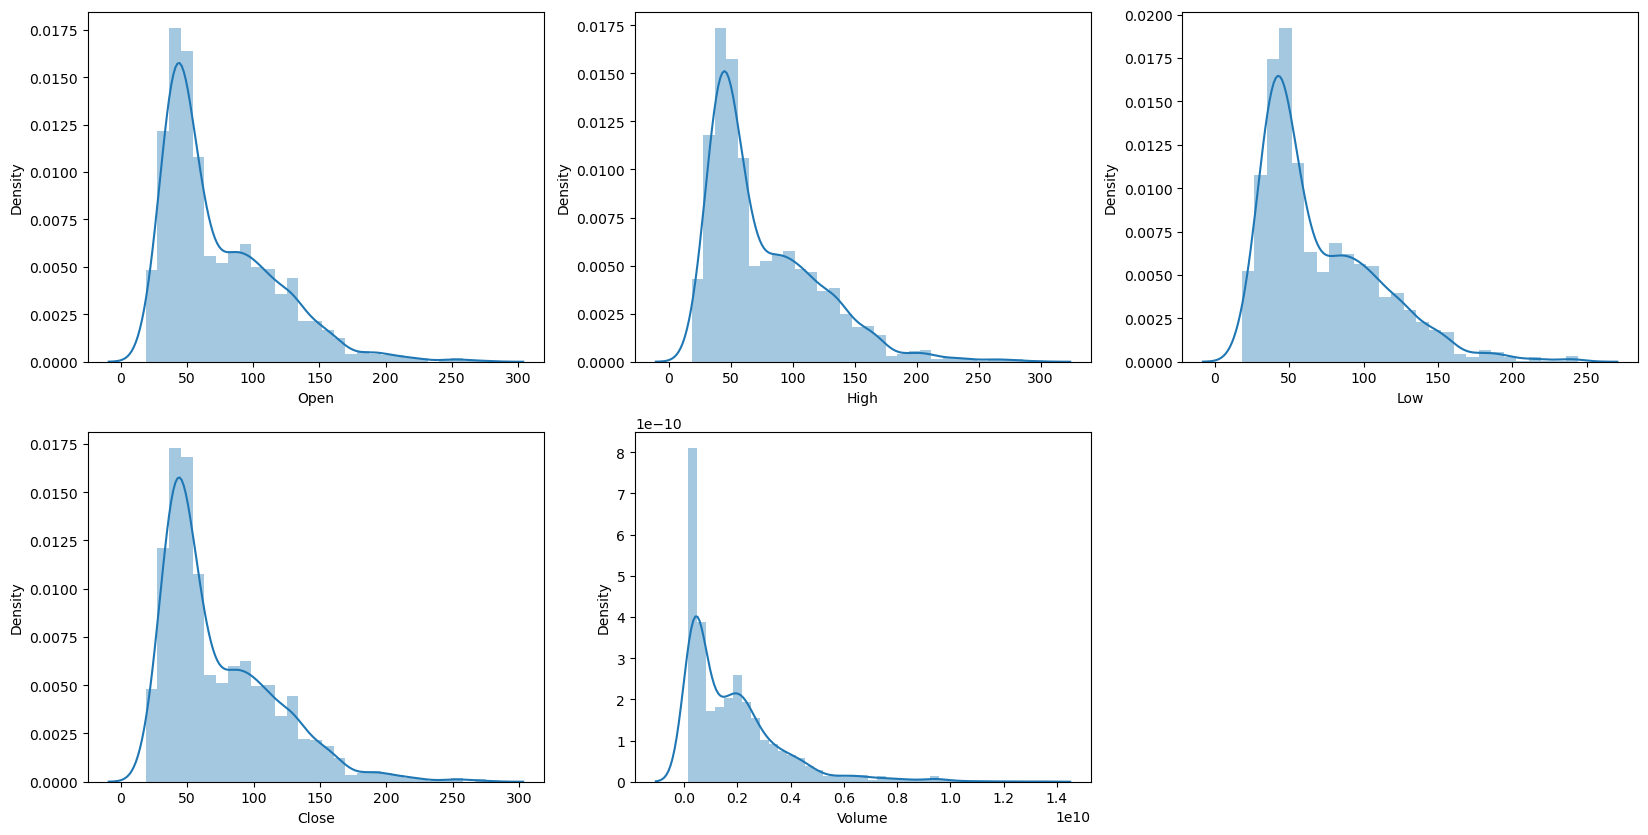

In [14]:
import seaborn as sns
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(data_LTC[col])
plt.show();

# Feature Engineering 

In [15]:
# #splitting datse to year month and day

# splitted = data['Date'].str.split('-', expand=True)

# data['day'] = splitted[1].astype('int')
# data['month'] = splitted[0].astype('int')
# data['year'] = splitted[2].astype('int')
# #droping the original(combiined) date
# data.drop(['Date'], axis =1, inplace = True)

data.head()


,Date,Open,High,Low,Close,Volume,coin_name
0,2018-01-30,841.599121,842.673218,748.600281,756.768433,2902260822,ETH-GBP
1,2018-01-31,756.740112,797.020020,730.940430,787.708740,2646728227,ETH-GBP
2,2018-02-01,788.455322,814.182556,690.422729,726.806885,3688524450,ETH-GBP
3,2018-02-02,726.091858,726.244568,531.691895,648.572937,4754454844,ETH-GBP
4,2018-02-03,650.999268,702.509216,600.347046,682.732971,2297082198,ETH-GBP


In [16]:
# convert the date column to a datetime data type
data['Date'] = pd.to_datetime(data['Date'])
# convert the date column to a float data type using Unix time (seconds since 1970-01-01)
data['Date'] = (data['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data['Date'] = data['Date'].astype(float)

data = pd.get_dummies(data, columns=['coin_name'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31776 entries, 0 to 31775
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 31776 non-null  float64
 1   Open                 31776 non-null  float64
 2   High                 31776 non-null  float64
 3   Low                  31776 non-null  float64
 4   Close                31776 non-null  float64
 5   Volume               31776 non-null  int64  
 6   coin_name_ADA-GBP    31776 non-null  uint8  
 7   coin_name_ATOM-GBP   31776 non-null  uint8  
 8   coin_name_AVAX-GBP   31776 non-null  uint8  
 9   coin_name_BNB-GBP    31776 non-null  uint8  
 10  coin_name_BTC-GBP    31776 non-null  uint8  
 11  coin_name_DAI-GBP    31776 non-null  uint8  
 12  coin_name_DOGE-GBP   31776 non-null  uint8  
 13  coin_name_DOT-GBP    31776 non-null  uint8  
 14  coin_name_ETH-GBP    31776 non-null  uint8  
 15  coin_name_FIL-GBP    31776 non-null 

In [18]:
x = list(data.columns)
data.columns =[i.split('_')[-1].replace('-', '_') for i in x]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31776 entries, 0 to 31775
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       31776 non-null  float64
 1   Open       31776 non-null  float64
 2   High       31776 non-null  float64
 3   Low        31776 non-null  float64
 4   Close      31776 non-null  float64
 5   Volume     31776 non-null  int64  
 6   ADA_GBP    31776 non-null  uint8  
 7   ATOM_GBP   31776 non-null  uint8  
 8   AVAX_GBP   31776 non-null  uint8  
 9   BNB_GBP    31776 non-null  uint8  
 10  BTC_GBP    31776 non-null  uint8  
 11  DAI_GBP    31776 non-null  uint8  
 12  DOGE_GBP   31776 non-null  uint8  
 13  DOT_GBP    31776 non-null  uint8  
 14  ETH_GBP    31776 non-null  uint8  
 15  FIL_GBP    31776 non-null  uint8  
 16  FTM_GBP    31776 non-null  uint8  
 17  GRC_GBP    31776 non-null  uint8  
 18  LINK_GBP   31776 non-null  uint8  
 19  LTC_GBP    31776 non-null  uint8  
 20  MATIC_

In [20]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ADA_GBP', 'ATOM_GBP',
       'AVAX_GBP', 'BNB_GBP', 'BTC_GBP', 'DAI_GBP', 'DOGE_GBP', 'DOT_GBP',
       'ETH_GBP', 'FIL_GBP', 'FTM_GBP', 'GRC_GBP', 'LINK_GBP', 'LTC_GBP',
       'MATIC_GBP', 'SOL_GBP', 'TRX_GBP', 'USDC_GBP', 'USDT_GBP', 'XRP_GBP'],
      dtype='object')

In [21]:
data.head(10)

,Date,Open,High,Low,Close,Volume,ADA_GBP,ATOM_GBP,AVAX_GBP,BNB_GBP,...,FTM_GBP,GRC_GBP,LINK_GBP,LTC_GBP,MATIC_GBP,SOL_GBP,TRX_GBP,USDC_GBP,USDT_GBP,XRP_GBP
0,1.517270e+09,841.599121,842.673218,748.600281,756.768433,2902260822,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.517357e+09,756.740112,797.020020,730.940430,787.708740,2646728227,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.517443e+09,788.455322,814.182556,690.422729,726.806885,3688524450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.517530e+09,726.091858,726.244568,531.691895,648.572937,4754454844,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.517616e+09,650.999268,702.509216,600.347046,682.732971,2297082198,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.517702e+09,683.191895,686.283264,570.724548,591.553528,2124089332,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.517789e+09,591.749146,606.904724,460.493652,500.574463,3062131616,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.517875e+09,507.593048,570.719482,411.504425,568.301819,4670586093,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.517962e+09,566.371460,611.933899,518.032898,545.477356,2807248338,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.518048e+09,544.594727,608.544678,544.516235,586.914734,2661253016,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# outlier removal

In [22]:
df = data.copy()
# Calculate the IQR of the 'Close' column
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df = df[(df['Close'] >= Q1 - 1.5 * IQR) & (df['Close'] <= Q3 + 1.5 * IQR)]


In [23]:
# Spliting the data into training and testing sets
X = df.drop('Close', axis=1)  # Features
y = df['Close']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing and model developement

In [24]:
numeric_features = ['Date','Open', 'High', 'Low', 'Volume']
categorical_features = ['ADA_GBP', 'ATOM_GBP',
       'AVAX_GBP', 'BNB_GBP', 'BTC_GBP', 'DAI_GBP', 'DOGE_GBP', 'DOT_GBP',
       'ETH_GBP', 'FIL_GBP', 'FTM_GBP', 'GRC_GBP', 'LINK_GBP', 'LTC_GBP',
       'MATIC_GBP', 'SOL_GBP', 'TRX_GBP', 'USDC_GBP', 'USDT_GBP', 'XRP_GBP']

In [25]:
# Standardizing numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [26]:
# One-hot encoding categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [27]:
# Combine the numeric and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [28]:
# Build and evaluate machine learning models
models = [('Linear Regression', LinearRegression()),
          ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
          ('Random Forest Regression', RandomForestRegressor(random_state=42))]


In [29]:
# Iterate over the list of models
for name, model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    # Evaluate the model using cross-validation and the mean squared error
    scores = -1 * cross_val_score(pipeline, X_train, y_train,
                                  cv=5, scoring='neg_mean_squared_error')
    # Compute the mean and standard deviation of the scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{name} - Mean Squared Error: {mean_score:.4f} (+/- {std_score:.4f})")
    
    # Evaluate the model using the mean absolute error
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} - Mean Absolute Error: {mae:.4f}\n")
    print(f"{name} - model_score: {r2_score(y_test, y_pred):.4f}\n")


Linear Regression - Mean Squared Error: 0.1567 (+/- 0.1061)
Linear Regression - Mean Absolute Error: 0.1126

Linear Regression - model_score: 0.9992

Decision Tree Regression - Mean Squared Error: 0.2505 (+/- 0.0369)
Decision Tree Regression - Mean Absolute Error: 0.1473

Decision Tree Regression - model_score: 0.9981

Random Forest Regression - Mean Squared Error: 0.1473 (+/- 0.0253)
Random Forest Regression - Mean Absolute Error: 0.1131

Random Forest Regression - model_score: 0.9990



# CREATING ESEMBLE LEARNING
|------------------------ Uisng Voting Regressor -----------------|

In [30]:
from sklearn.ensemble import VotingRegressor

# Create a list of tuples with the model name and the model object
models = [('Linear Regression', LinearRegression()),
          ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
          ('Random Forest Regression', RandomForestRegressor(random_state=42))]

# Create the ensemble model using voting with 'neg_mean_squared_error' scoring
ensemble = VotingRegressor(estimators=models)

# Fit the ensemble model to the training data
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Decision Tree Regression',
                             DecisionTreeRegressor(random_state=42)),
                            ('Random Forest Regression',
                             RandomForestRegressor(random_state=42))])

In [31]:
# Evaluate the ensemble model using the mean squared error and mean absolute error
y_pred = ensemble.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Ensemble - Mean Squared Error: {mse:.4f}")
print(f"Ensemble - Mean Absolute Error: {mae:.4f}")
print(f"{ensemble} - model_score: {r2_score(y_test, y_pred):.4f}\n")

Ensemble - Mean Squared Error: 0.1094
Ensemble - Mean Absolute Error: 0.1116
VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Decision Tree Regression',
                             DecisionTreeRegressor(random_state=42)),
                            ('Random Forest Regression',
                             RandomForestRegressor(random_state=42))]) - model_score: 0.9991



# saving, loading and making predictions with the model

In [54]:
# saving the model for reuse
import joblib
# joblib.dump(ensemble, 'ensemble.sav')

['ensemble.sav']

In [53]:
# make a prediction using the ensemble model
model  = joblib.load('ensemble.sav')

In [45]:
# create a new DataFrame with the same columns as the training data
new_data = pd.DataFrame({'Date': [1.674605],'Open': [10.098482], 'High': [11.040346], 'Low': [9.882684], 'Volume': [21.2813432],
                         'ADA_GBP': [0], 'ATOM_GBP': [0], 'AVAX_GBP': [0], 'BNB_GBP': [0], 'BTC_GBP': [0], 'DAI_GBP': [0],
                         'DOGE_GBP': [0], 'DOT_GBP': [0], 'ETH_GBP': [0], 'FIL_GBP': [0], 'FTM_GBP': [0], 'GRC_GBP': [0],
                         'LINK_GBP': [0], 'LTC_GBP': [0], 'MATIC_GBP': [0], 'SOL_GBP': [0], 'TRX_GBP': [0], 'USDC_GBP': [0],
                         'USDT_GBP': [0], 'XRP_GBP': [0]})

# make a prediction using the ensemble model
prediction = model.predict(new_data)

print(prediction)

[10.8521479]
